# How to simulate missing values in Python?

Thomas Schmitt

## Intro

Missing values occur in many domains and most datasets contain missing values (due to non-responses, lost records, machine failures, dataset fusions, etc.). These missing values have to be considered before or during analyses of these datasets.

Now, if you have a method that deals with missing values, for instance imputation or estimation with missing values, how can you assess the performance of your method on a given dataset? If the data already contains missing values, than this does not help you since you generally do not have a ground truth for these missing values. So you will have to simulate missing values, i.e. you remove values – which you therefore know to be the ground truth – to generate missing values.

The mechanisms generating missing values can be various but usually they are classified into three main categories defined by (Rubin 1976): missing completely at random (MCAR), missing at random (MAR) and missing not at random (MNAR). The first two are also qualified as ignorable missing values mechanisms, for instance in likelihood-based approaches to handle missing values, whereas the MNAR mechanism generates nonignorable missing values. In the following we will briefly introduce each mechanism (with the definitions used widely in the literature) and propose ways of simulations missing values under these three mechanism assumptions. For more precise definitions we refer to references in the bibliography on the R-miss-tastic website.



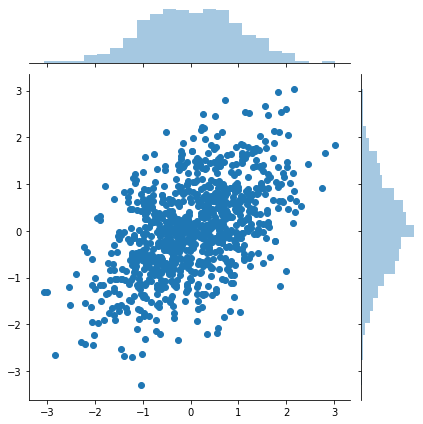

In [177]:
# generate complete data

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

np.random.seed(0)  # fix the seed (to obtain reproductible results)

n_samples = 900

mean = (0,0)
cov = [[1,.5],[.5,1]]
X_complete = np.random.multivariate_normal(mean, cov, size=n_samples)

#plt.scatter(X_complete[:,0], X_complete[:,1])
sns.jointplot(X_complete[:,0], X_complete[:,1], label = 'Complete data')

## 1. MCAR Mechanism (Missing Completly at Random)

The observations are said to be Missing Completely At Random (MCAR) if the probability that an observation is missing is independent of the variables and observations: the probability that an observation is missing does not depend on (X_complete and X). Formally this is:
ℙR(R|X_complete,X;ϕ)=ℙR(R)∀ϕ.


In Python, the easiest way is to sample a Bernouilli to mask some data point

In [178]:
def ampute_mcar(X_complete, missing_rate = .2):
    missing_mask = np.random.binomial(1, missing_rate, size = (n_samples,2))
    X_obs = X_complete.copy()
    np.putmask(X_obs, missing_mask, np.nan)
    return X_obs

In [179]:
X_obs_mcar = ampute_mcar(X_complete)

print('X_obs_mcar = ')
print(X_obs_mcar[:10])
print('  ...')

X_obs_mcar = 
[[-1.72779275         nan]
 [-1.96805856  0.27283464]
 [-1.12871372 -2.1059916 ]
 [        nan         nan]
 [-0.1159091   0.2946894 ]
 [-0.85188215  0.60239136]
 [-0.71991551 -0.59824049]
 [-0.551234   -0.21755967]
 [        nan -1.39648956]
 [        nan         nan]]
  ...


In [186]:
def scatter_plot_with_missing(X_complete, X_obs):
    # scatter plot with historgams
    
    row_with_missing = [any(np.isnan(x)) for x in X_obs]
    X_missing = X_complete[row_with_missing]

    g = sns.JointGrid(X_obs[:,0], X_obs[:,1])

    sns.kdeplot(X_obs[:,0], ax=g.ax_marg_x)
    sns.kdeplot(X_obs[:,1], ax=g.ax_marg_y, vertical=True, label='observed')
    g.ax_joint.plot(X_obs[:,0], X_obs[:,1], "o", label='observed', alpha = .7)

    sns.kdeplot(X_missing[:,0], ax=g.ax_marg_x)
    sns.kdeplot(X_missing[:,1], ax=g.ax_marg_y, vertical=True, label='missing')
    g.ax_joint.plot(X_missing[:,0], X_missing[:,1], "*", label='missing', alpha = .7)
    
    plt.legend()
    plt.tight_layout()
    plt.show()
    

def plot_data(X_complete, X_obs):
    
    scatter_plot_with_missing(X_complete, X_obs)
    
    plt.figure(figsize=(7,7))
    ax1 = plt.subplot2grid((1, 10), (0, 0), colspan=9)
    
    values_missing = X_complete[np.isnan(X_obs)]
    ax1.hist(X_obs.ravel(), bins = 30, density=1,
             alpha = .4, label = 'observed values')
    ax1.hist(values_missing, bins = 30, density=1,
             alpha = .4, label = 'missing values')
    
    ax1.hist(values_missing, bins = 30, density=1,
             alpha = .4, label = 'missing values normalized by original sampling',
            weights = np.exp(values_missing**2/2))
    
#     ax1.hist(X_obs.ravel(), bins = 30, density=1,
#          alpha = .4, label = 'X_obs.ravel() values normalized',
#         weights = np.exp(X_obs.ravel()**2/2))
    ax1.legend()
    ax1.set_title('distribution of the values')

    ax2 = plt.subplot2grid((1, 10), (0, 9))
    ax2.matshow(X_obs[:60], aspect='auto'); #, fignum=False
    ax2.set_title('X_obs');
    ax2.set_xticks([])
    ax2.set_yticks([])    

X_obs with "MCAR" mechanism


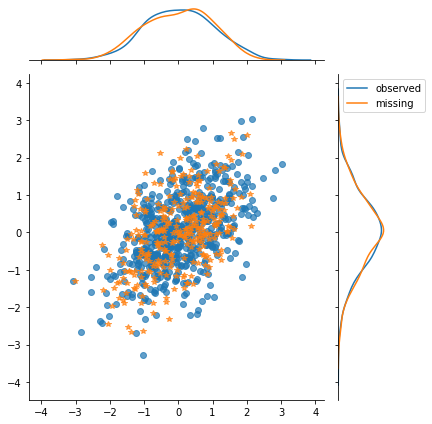

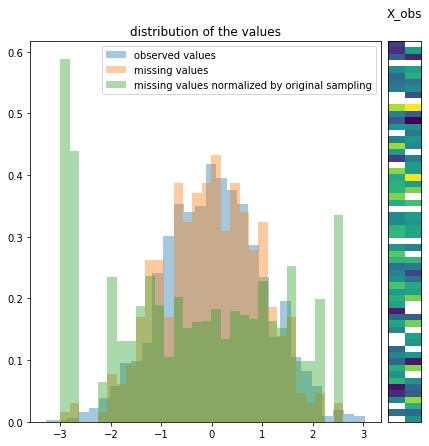

In [187]:
print('X_obs with "MCAR" mechanism')
plot_data(X_complete, X_obs_mcar)

In [182]:
print('Percentage of newly generated mising values: {}'.\
      format(np.sum(np.isnan(X_obs_mcar))/X_obs_mcar.size))

Percentage of newly generated mising values: 0.1922222222222222


## MAR (Missing At Random)

The observations are said to be Missing At Random (MAR) if the probability that an observation is missing only depends on the observed data Xobs. Formally,

ℙR(R|Xobs,Xmis;ϕ)=ℙR(R|Xobs;ϕ)∀ϕ,∀Xmis.

[Mice ampute](https://rianneschouten.github.io/mice_ampute/vignette/ampute.html)

In [ ]:
# a pool of 'decideurs' variables will define if other 'potential' feats will be missing
# e.g. those who take a lot of cafe (X[:,0] >> 1) won't fill the last question (X[:,-1] ~ np.nan)

alpha = X[0] like
for i in range(X.shape[0]):
    
    p = X.shape[1]

    decideurs = np.random.choice(np.arange(p), size = p // 2, replace = False)
    miss_potential = set(np.arange(p)) - set(decideurs)
    pp = len(miss_potential)

    WS1 = X[i].dot(alpha1)
    WS2 = X[i].dot(alpha2)
    miss_feats = [WS1 % pp, WS2 % pp]

# MNAR (Missing Not At Random)

In [183]:
from scipy.special import expit as sigmoid  # logistic function

def ampute_mnar(X_complete, missing_rate = .2):
    """ ampute X_complete with Missing Not At Random mechanism
    
    The missingness pattern depends of the values of X_complete
    This will tends to "censor" X[i,j] where abs(X[i,j]) is high 
    comparing to X[:,j]
    """
    
    X_obs = X_complete.copy()
    n_drop_per_feature = int(missing_rate * X_complete.shape[0])
    for x in np.transpose(X_obs):  # for each column
        weights = sigmoid(np.abs(x - x.mean())**9)
        prob = weights / weights.sum()
        drop_idx = np.random.choice(
            X_complete.shape[0], p=prob, replace=False, size=n_drop_per_feature
        )
        x[drop_idx] = np.nan
    return X_obs

In [184]:
X_obs_mnar = ampute_mnar(X_complete)

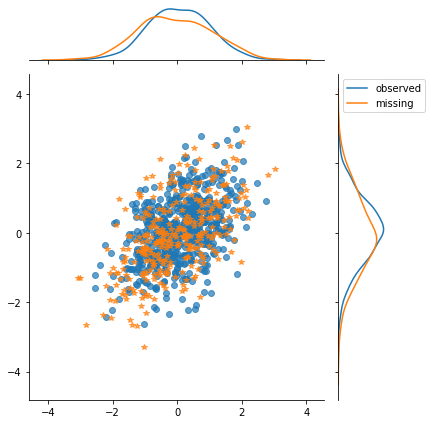

X_obs with "MCAR" mechanism


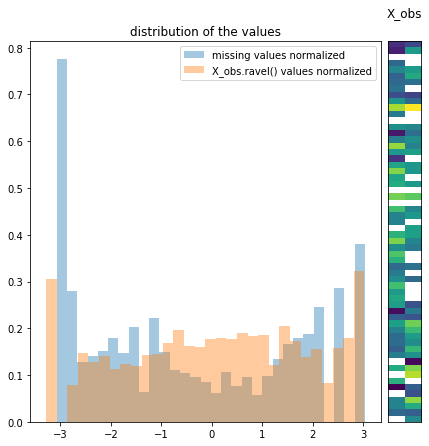

In [185]:
plot_data(X_complete, X_obs_mnar)
print('X_obs with "MCAR" mechanism')

In [148]:
print('Percentage of newly generated mising values: {}'.\
      format(np.sum(np.isnan(X_obs_mnar))/X_obs_mnar.size))

Percentage of newly generated mising values: 0.2


In [ ]:

    
def plot_data_v0(X_complete, X_obs):
    
    scatter_plot_with_missing(X_complete, X_obs)
    
    plt.figure(figsize=(7,7))
    ax1 = plt.subplot2grid((3, 3), (0, 0))
    ax2 = plt.subplot2grid((3, 3), (0, 1), colspan=2)
    plt.subplot(1,3,1, colspan=2)
#     row_with_missing = [any(np.isnan(x)) for x in X_obs]
#     plt.scatter(X_obs[:, 0], X_obs[:, 1], label='non-missing', alpha = 1)
#     plt.scatter(X_complete[row_with_missing, 0], X_complete[row_with_missing, 1],
#                     marker='*', s = 40, label='missing coordinate')
#     plt.legend()
#     plt.xlabel("X0")
#     plt.ylabel("X1")
#     plt.title('Scatter plot');
    values_missing = X_complete[np.isnan(X_obs)]
    plt.hist(X_complete.ravel(), bins = 50, density=1,
             alpha = .4, label = 'complete data')
    plt.hist(values_missing, bins = 20, density=1,
             alpha = .4, label = 'missing values')
    plt.legend()
    plt.subplot(1,3,2, colspan=1)
    plt.matshow(X_obs[:60], fignum=False, aspect='auto');
    plt.title('X_obs');
    plt.xticks([])
    plt.yticks([])